### Plotting Earthquakes in past 24 hours

An earthquake (also known as a quake, tremor or temblor) is the shaking of the surface of the Earth resulting from a sudden release of energy in the Earth's lithosphere that creates seismic waves. Earthquakes can range in size from those that are so weak that they cannot be felt to those violent enough to propel objects and people into the air, and wreak destruction across entire cities. The seismicity, or seismic activity, of an area is the frequency, type, and size of earthquakes experienced over a period of time. The word tremor is also used for non-earthquake seismic rumbling.

At the Earth's surface, earthquakes manifest themselves by shaking and displacing or disrupting the ground. When the epicenter of a large earthquake is located offshore, the seabed may be displaced sufficiently to cause a tsunami. Earthquakes can also trigger landslides and occasionally, volcanic activity.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Global_plate_motion_2008-04-17.jpg/300px-Global_plate_motion_2008-04-17.jpg'>

In its most general sense, the word earthquake is used to describe any seismic event—whether natural or caused by humans—that generates seismic waves. Earthquakes are caused mostly by rupture of geological faults but also by other events such as volcanic activity, landslides, mine blasts, and nuclear tests. An earthquake's point of initial rupture is called its hypocenter or focus. The epicenter is the point at ground level directly above the hypocenter.


Learn more here : https://en.wikipedia.org/wiki/Earthquake

In [1]:
# importing libraries

# pip install pandas
# pip install matplotlib
# for cartopy : https://youtu.be/qxSCoR9BO6A

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
# plot setup 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,10)

In [3]:
# link for downloading dataset

# http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv

In [4]:
# reading csv

data = pd.read_csv('1.0_week.csv')
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-06-15T17:33:28.056Z,36.437038,-95.707848,5.00,2.12,ml,11.0,210.019905,0.612367,0.908402,...,2020-06-15T17:36:13.030Z,"1 km S of Oologah, Oklahoma",earthquake,8.189484,NaN,NaN,7.0,automatic,ok,ok
1,2020-06-15T17:33:22.180Z,35.058833,-118.956500,12.67,1.17,ml,13.0,74.000000,0.123900,0.290000,...,2020-06-15T17:37:08.330Z,"13km N of Grapevine, CA",earthquake,0.680000,2.12,0.078,14.0,automatic,ci,ci
2,2020-06-15T17:19:29.150Z,24.924300,123.252000,10.00,4.70,mb,NaN,82.000000,0.505000,0.700000,...,2020-06-15T17:34:22.040Z,"56 km NNE of Yonakuni, Japan",earthquake,5.700000,1.90,0.098,32.0,reviewed,us,us
3,2020-06-15T17:11:58.514Z,61.648100,-142.043800,0.00,1.80,ml,NaN,NaN,NaN,1.050000,...,2020-06-15T17:16:58.322Z,"52 km ENE of McCarthy, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
4,2020-06-15T17:08:20.330Z,38.157200,-117.966000,0.20,1.50,ml,14.0,103.020000,0.052000,0.110000,...,2020-06-15T17:20:03.873Z,"28 km SSE of Mina, Nevada",earthquake,NaN,4.40,NaN,NaN,automatic,nn,nn


In [22]:
# converting time column to datetime

data['time'] = pd.to_datetime(data['time'])
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-06-15 17:33:28.056000+00:00,36.437038,-95.707848,5.00,2.12,ml,11.0,210.019905,0.612367,0.908402,...,2020-06-15T17:36:13.030Z,"1 km S of Oologah, Oklahoma",earthquake,8.189484,NaN,NaN,7.0,automatic,ok,ok
1,2020-06-15 17:33:22.180000+00:00,35.058833,-118.956500,12.67,1.17,ml,13.0,74.000000,0.123900,0.290000,...,2020-06-15T17:37:08.330Z,"13km N of Grapevine, CA",earthquake,0.680000,2.12,0.078,14.0,automatic,ci,ci
2,2020-06-15 17:19:29.150000+00:00,24.924300,123.252000,10.00,4.70,mb,NaN,82.000000,0.505000,0.700000,...,2020-06-15T17:34:22.040Z,"56 km NNE of Yonakuni, Japan",earthquake,5.700000,1.90,0.098,32.0,reviewed,us,us
3,2020-06-15 17:11:58.514000+00:00,61.648100,-142.043800,0.00,1.80,ml,NaN,NaN,NaN,1.050000,...,2020-06-15T17:16:58.322Z,"52 km ENE of McCarthy, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
4,2020-06-15 17:08:20.330000+00:00,38.157200,-117.966000,0.20,1.50,ml,14.0,103.020000,0.052000,0.110000,...,2020-06-15T17:20:03.873Z,"28 km SSE of Mina, Nevada",earthquake,NaN,4.40,NaN,NaN,automatic,nn,nn


In [41]:
# adding date column to dataframe

import datetime

data['Date'] = [datetime.datetime.date(d) for d in data['time']] 

In [40]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Date
0,2020-06-15 17:33:28.056000+00:00,36.437038,-95.707848,5.00,2.12,ml,11.0,210.019905,0.612367,0.908402,...,"1 km S of Oologah, Oklahoma",earthquake,8.189484,NaN,NaN,7.0,automatic,ok,ok,2020-06-15
1,2020-06-15 17:33:22.180000+00:00,35.058833,-118.956500,12.67,1.17,ml,13.0,74.000000,0.123900,0.290000,...,"13km N of Grapevine, CA",earthquake,0.680000,2.12,0.078,14.0,automatic,ci,ci,2020-06-15
2,2020-06-15 17:19:29.150000+00:00,24.924300,123.252000,10.00,4.70,mb,NaN,82.000000,0.505000,0.700000,...,"56 km NNE of Yonakuni, Japan",earthquake,5.700000,1.90,0.098,32.0,reviewed,us,us,2020-06-15
3,2020-06-15 17:11:58.514000+00:00,61.648100,-142.043800,0.00,1.80,ml,NaN,NaN,NaN,1.050000,...,"52 km ENE of McCarthy, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak,2020-06-15
4,2020-06-15 17:08:20.330000+00:00,38.157200,-117.966000,0.20,1.50,ml,14.0,103.020000,0.052000,0.110000,...,"28 km SSE of Mina, Nevada",earthquake,NaN,4.40,NaN,NaN,automatic,nn,nn,2020-06-15


In [64]:
# counting number of earthquakes each day in this week

x = data['Date'].value_counts()
x

2020-06-09    416
2020-06-10    371
2020-06-11    369
2020-06-13    360
2020-06-12    323
2020-06-14    284
2020-06-15    229
2020-06-08    106
Name: Date, dtype: int64

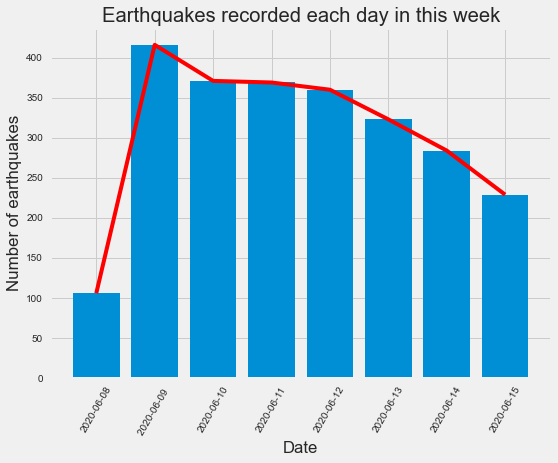

In [80]:
# drawing a bar chart for above data

d = ['2020-06-08','2020-06-09 ','2020-06-10','2020-06-11','2020-06-12','2020-06-13','2020-06-14','2020-06-15']
v = [106,416,371,369,360,323,284,229]
i = [i for i in range(len(d))]

plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')

plt.title('Earthquakes recorded each day in this week')
plt.ylabel('Number of earthquakes')
plt.xlabel('Date')

plt.plot(d,v, c='r')
plt.bar(d,v)
plt.xticks(rotation=60)
plt.show()

In [52]:
# function for getting color

def get_color(magnitude):
    if magnitude < 3.0:
        return 'g'
    elif 3.0 <= magnitude < 5.0:
        return 'y'
    else:
        return 'r'

In [53]:
# getting latitude, longitudes and magnitudes

lats = list(data['latitude'])
lons = list(data['longitude'])
mag = list(data['mag'])


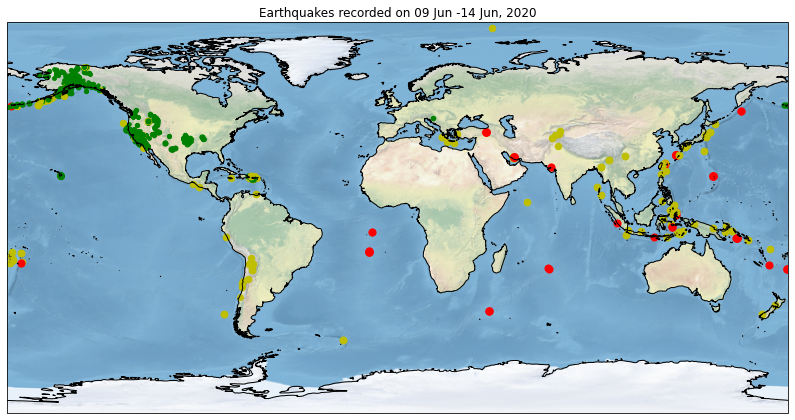

In [55]:
# plotting data on map

ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

for i in range(len(mag)):
    color = get_color(mag[i])
    plt.scatter(lons[i], lats[i], s=mag[i]*10, c=color)

plt.title('Earthquakes recorded on 09 Jun -14 Jun, 2020')
plt.show()

In [6]:
# getting 1 day data

mask = ((data['time'] >= '2020-06-14') & (data['time'] < '2020-06-15'))
df = data.loc[mask]

In [7]:
# printing one day data

df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
229,2020-06-14 23:55:30.670000+00:00,38.145500,-117.880300,11.70,2.20,ml,22.0,57.70,0.03400,0.1300,...,2020-06-15T00:05:37.241Z,"33 km SE of Mina, Nevada",earthquake,NaN,0.60,NaN,NaN,automatic,nn,nn
230,2020-06-14 23:37:21.970000+00:00,33.097833,-115.891333,1.14,1.29,ml,16.0,86.00,0.22040,0.3600,...,2020-06-14T23:41:12.498Z,"23km ESE of Ocotillo Wells, CA",earthquake,0.74,31.61,0.150,28.0,automatic,ci,ci
231,2020-06-14 23:36:59.260000+00:00,38.172800,-117.833200,9.30,1.80,ml,21.0,63.17,0.01900,0.1100,...,2020-06-14T23:46:18.727Z,"34 km SE of Mina, Nevada",earthquake,NaN,0.60,NaN,NaN,automatic,nn,nn
232,2020-06-14 23:36:02.420000+00:00,33.164833,-115.652167,3.91,1.55,ml,17.0,58.00,0.03081,0.1600,...,2020-06-14T23:40:00.459Z,"14km WNW of Calipatria, CA",earthquake,0.31,0.43,0.222,31.0,automatic,ci,ci
233,2020-06-14 23:31:33.195000+00:00,63.945700,-148.958800,0.00,1.50,ml,NaN,NaN,NaN,0.9200,...,2020-06-14T23:36:19.662Z,"9 km N of Healy, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,2020-06-14 00:31:47.060000+00:00,35.697667,-117.520167,3.97,1.02,ml,12.0,158.00,0.12060,0.2500,...,2020-06-14T00:35:17.609Z,"13km SW of Searles Valley, CA",earthquake,0.71,1.44,0.149,9.0,automatic,ci,ci
509,2020-06-14 00:30:19.631000+00:00,63.500200,-146.608500,0.00,1.30,ml,NaN,NaN,NaN,1.1800,...,2020-06-14T00:36:13.460Z,"67 km NW of Paxson, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
510,2020-06-14 00:16:55.582000+00:00,38.131000,-118.004200,2.20,1.50,ml,12.0,109.06,0.04800,0.1423,...,2020-06-15T02:16:24.885Z,"30 km SSE of Mina, Nevada",earthquake,NaN,1.40,0.530,4.0,reviewed,nn,nn
511,2020-06-14 00:16:41.904000+00:00,38.045300,-118.754100,8.70,1.10,ml,11.0,187.93,0.28400,0.0547,...,2020-06-15T02:17:17.567Z,"33 km ENE of Lee Vining, California",earthquake,NaN,10.60,0.080,2.0,reviewed,nn,nn


In [8]:
# minimum magnitude earthquake

print(df[df.mag == df.mag.min()])

                                time   latitude  longitude  depth   mag  \
395 2020-06-14 09:00:19.760000+00:00  38.742668  -122.7145   0.89  0.95   

    magType   nst    gap     dmin   rms  ...                   updated  \
395      md  10.0  204.0  0.02056  0.03  ...  2020-06-14T11:25:06.882Z   

                               place        type horizontalError depthError  \
395  4km SSW of Anderson Springs, CA  earthquake            0.82       0.46   

     magError  magNst     status  locationSource magSource  
395      0.03     3.0  automatic              nc        nc  

[1 rows x 22 columns]


In [9]:
# maximum magnitude earthquake

print(df[df.mag == df.mag.max()])

                                time  latitude  longitude  depth  mag magType  \
335 2020-06-14 14:24:29.496000+00:00   39.4214    40.6969   10.0  5.9     mww   

     nst   gap   dmin   rms  ...                   updated  \
335  NaN  24.0  0.615  0.63  ...  2020-06-15T16:46:54.691Z   

                         place        type horizontalError depthError  \
335  14 km E of Yedisu, Turkey  earthquake             4.0        1.8   

     magError  magNst    status  locationSource magSource  
335     0.059    28.0  reviewed              us        us  

[1 rows x 22 columns]


In [10]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
229,2020-06-14 23:55:30.670000+00:00,38.145500,-117.880300,11.70,2.20,ml,22.0,57.70,0.03400,0.1300,...,2020-06-15T00:05:37.241Z,"33 km SE of Mina, Nevada",earthquake,NaN,0.60,NaN,NaN,automatic,nn,nn
230,2020-06-14 23:37:21.970000+00:00,33.097833,-115.891333,1.14,1.29,ml,16.0,86.00,0.22040,0.3600,...,2020-06-14T23:41:12.498Z,"23km ESE of Ocotillo Wells, CA",earthquake,0.74,31.61,0.150,28.0,automatic,ci,ci
231,2020-06-14 23:36:59.260000+00:00,38.172800,-117.833200,9.30,1.80,ml,21.0,63.17,0.01900,0.1100,...,2020-06-14T23:46:18.727Z,"34 km SE of Mina, Nevada",earthquake,NaN,0.60,NaN,NaN,automatic,nn,nn
232,2020-06-14 23:36:02.420000+00:00,33.164833,-115.652167,3.91,1.55,ml,17.0,58.00,0.03081,0.1600,...,2020-06-14T23:40:00.459Z,"14km WNW of Calipatria, CA",earthquake,0.31,0.43,0.222,31.0,automatic,ci,ci
233,2020-06-14 23:31:33.195000+00:00,63.945700,-148.958800,0.00,1.50,ml,NaN,NaN,NaN,0.9200,...,2020-06-14T23:36:19.662Z,"9 km N of Healy, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,2020-06-14 00:31:47.060000+00:00,35.697667,-117.520167,3.97,1.02,ml,12.0,158.00,0.12060,0.2500,...,2020-06-14T00:35:17.609Z,"13km SW of Searles Valley, CA",earthquake,0.71,1.44,0.149,9.0,automatic,ci,ci
509,2020-06-14 00:30:19.631000+00:00,63.500200,-146.608500,0.00,1.30,ml,NaN,NaN,NaN,1.1800,...,2020-06-14T00:36:13.460Z,"67 km NW of Paxson, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
510,2020-06-14 00:16:55.582000+00:00,38.131000,-118.004200,2.20,1.50,ml,12.0,109.06,0.04800,0.1423,...,2020-06-15T02:16:24.885Z,"30 km SSE of Mina, Nevada",earthquake,NaN,1.40,0.530,4.0,reviewed,nn,nn
511,2020-06-14 00:16:41.904000+00:00,38.045300,-118.754100,8.70,1.10,ml,11.0,187.93,0.28400,0.0547,...,2020-06-15T02:17:17.567Z,"33 km ENE of Lee Vining, California",earthquake,NaN,10.60,0.080,2.0,reviewed,nn,nn


In [11]:
# getting latitude, longitudes and magnitudes

lats = list(df['latitude'])
lons = list(df['longitude'])
mag = list(df['mag'])


In [12]:
# function for getting color

def get_color(magnitude):
    if magnitude < 3.0:
        return 'g'
    elif 3.0 <= magnitude < 5.0:
        return 'y'
    else:
        return 'r'


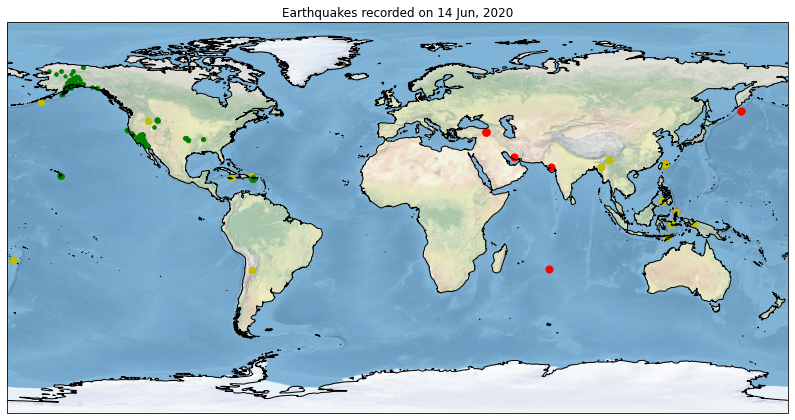

In [13]:
# plotting data on map

ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

for i in range(len(mag)):
    color = get_color(mag[i])
    plt.scatter(lons[i], lats[i], s=mag[i]*10, c=color)

plt.title('Earthquakes recorded on 14 Jun, 2020')
plt.show()